In [11]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("cleandata.csv")
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
x_data= df.drop('diagnosis', axis=1)
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values


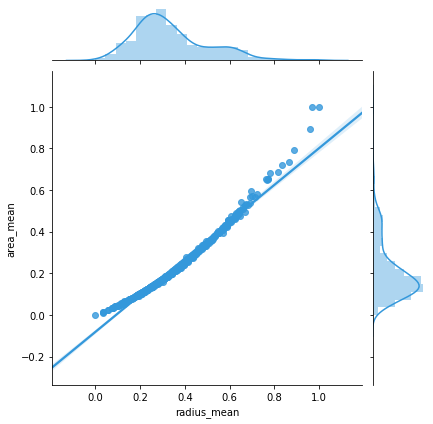

In [15]:
sns.jointplot(x.loc[:,'radius_mean'], x.loc[:,'area_mean'], kind="regg", color="#3498db")

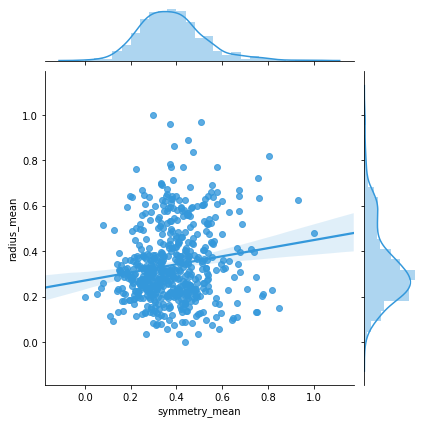

In [19]:
sns.jointplot(x.loc[:,'radius_mean'], x.loc[:,'area_mean'], kind="regg", color="#3498db")
sns.jointplot(x.loc[:,'symmetry_mean'], x.loc[:,'radius_mean'], kind="regg", color="#3498db")

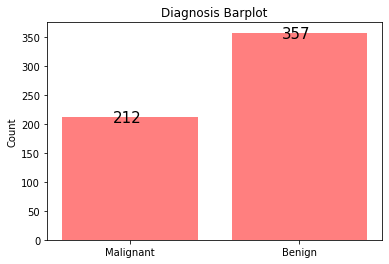

In [3]:
objects = ('Malignant', 'Benign')
y_pos = np.arange(len(objects))
performance = [sum(df.diagnosis==1), sum(df.diagnosis==0)]
plt.bar(y_pos, performance, align='center', alpha=0.5,color='red')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Diagnosis Barplot')
for i in range(len(y_pos)):
    plt.text(x = y_pos[i]-0.1, y = performance[i]-10, s = performance[i], size = 15)
plt.show()

In [4]:
# Check for missing values in dataframe
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# Featureset creation
X = df.drop('diagnosis', axis=1).values
# Standardize scale
X = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Actual clusters')

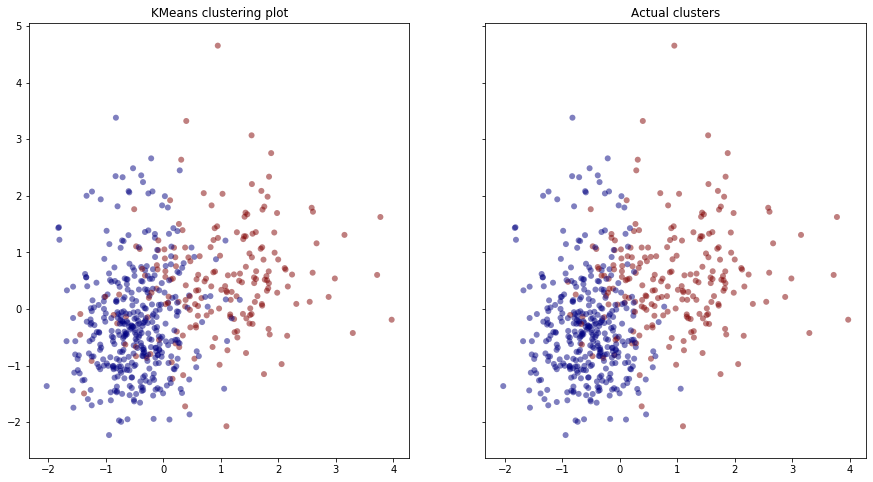

In [19]:
# Deploy K-Means Clustering 
# Set k=2, meaning two categories. i.e. either Malignant or Benign

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(X)
#labels = km.labels_

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,8))

ax1.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.5)
ax1.set_title("KMeans clustering plot")

ax2.scatter(X[:,0], X[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.5)
ax2.set_title("Actual clusters")


